In [ ]:
# @title
# !pip install pyfiglet
import pyfiglet
name = "KUSHAGRA"
ascii_art = pyfiglet.figlet_format(name)
print(ascii_art)


 _  ___   _ ____  _   _    _    ____ ____      _    
| |/ / | | / ___|| | | |  / \  / ___|  _ \    / \   
| ' /| | | \___ \| |_| | / _ \| |  _| |_) |  / _ \  
| . \| |_| |___) |  _  |/ ___ \ |_| |  _ <  / ___ \ 
|_|\_\\___/|____/|_| |_/_/   \_\____|_| \_\/_/   \_\
                                                    



In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [205]:
train = pd.read_csv('drive/MyDrive/who-is-the-real-winner/train.csv')
test = pd.read_csv('drive/MyDrive/who-is-the-real-winner/test.csv')

# Training Data preprocessing


In [180]:
train.head(5)

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [181]:
Y_train = train['Education']
Y_train = Y_train.to_frame()
train.drop(['Education'],axis = 1,inplace = True)

In [182]:
Y_train.shape

(2059, 1)

In [183]:
def clean_currency(x):
    if isinstance(x, str):
        if 'Crore+' in x:
            return float(x.replace(' Crore+', '')) * 10000000
        elif 'Lac+' in x:
            return float(x.replace(' Lac+', '')) * 100000
        elif 'Thou+' in x:
            return float(x.replace(' Thou+', '')) * 1000
        elif 'Hund+' in x:
            return float(x.replace(' Hund+', '')) * 1000
        else:
            return float(x.replace('$', '').replace(',', ''))
    return x


In [184]:
train['Total Assets'] = train['Total Assets'].apply(clean_currency)
train['Liabilities'] = train['Liabilities'].apply(clean_currency)


In [186]:
train.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,2.110000e+09,20000000.0,TAMIL NADU
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1.000000e+07,0.0,MADHYA PRADESH
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7.000000e+07,2200000.0,KARNATAKA
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9.000000e+07,2400000.0,BIHAR
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2.000000e+07,6100000.0,WEST BENGAL


In [187]:
print(train.shape)

(2059, 8)


In [188]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2059 non-null   int64  
 1   Candidate       2059 non-null   object 
 2   Constituency ∇  2059 non-null   object 
 3   Party           2059 non-null   object 
 4   Criminal Case   2059 non-null   int64  
 5   Total Assets    2059 non-null   float64
 6   Liabilities     2059 non-null   float64
 7   state           2059 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 128.8+ KB


In [189]:
train.isnull().sum()

ID                0
Candidate         0
Constituency ∇    0
Party             0
Criminal Case     0
Total Assets      0
Liabilities       0
state             0
dtype: int64

In [190]:
train.columns

Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state'],
      dtype='object')

Text(0, 0.5, 'Number of Unique Values')

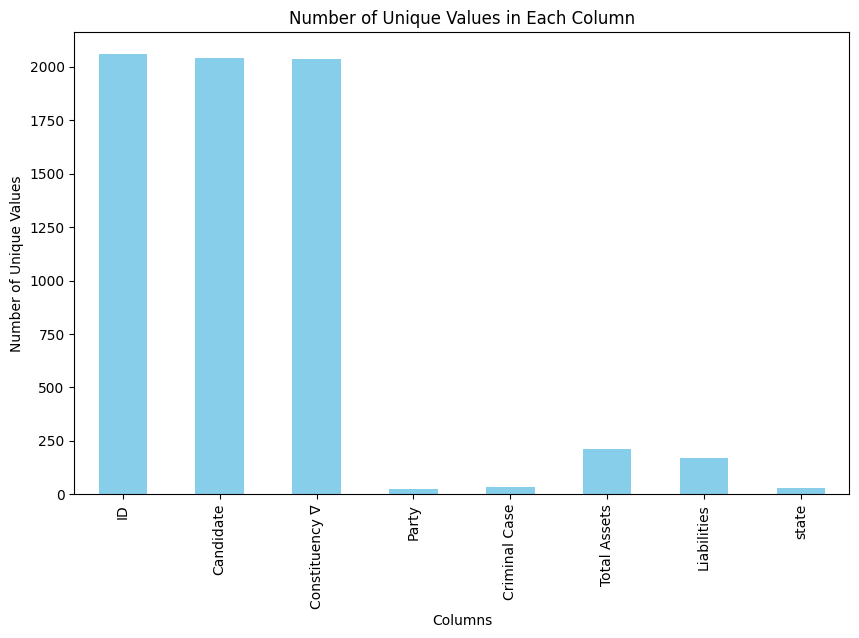

In [191]:
unique_values = train.nunique()

# Plot the results
plt.figure(figsize=(10, 6))
unique_values.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')

In [192]:
train.drop(['ID','Candidate'],axis = 1,inplace = True)

In [193]:
train.drop('Constituency ∇',axis=1,inplace=True)

In [195]:
train['Worth'] = train['Total Assets'] - train['Liabilities']

In [196]:
threshold = train['Worth'].to_frame().mean()
print(threshold)

Worth    9.400844e+07
dtype: float64


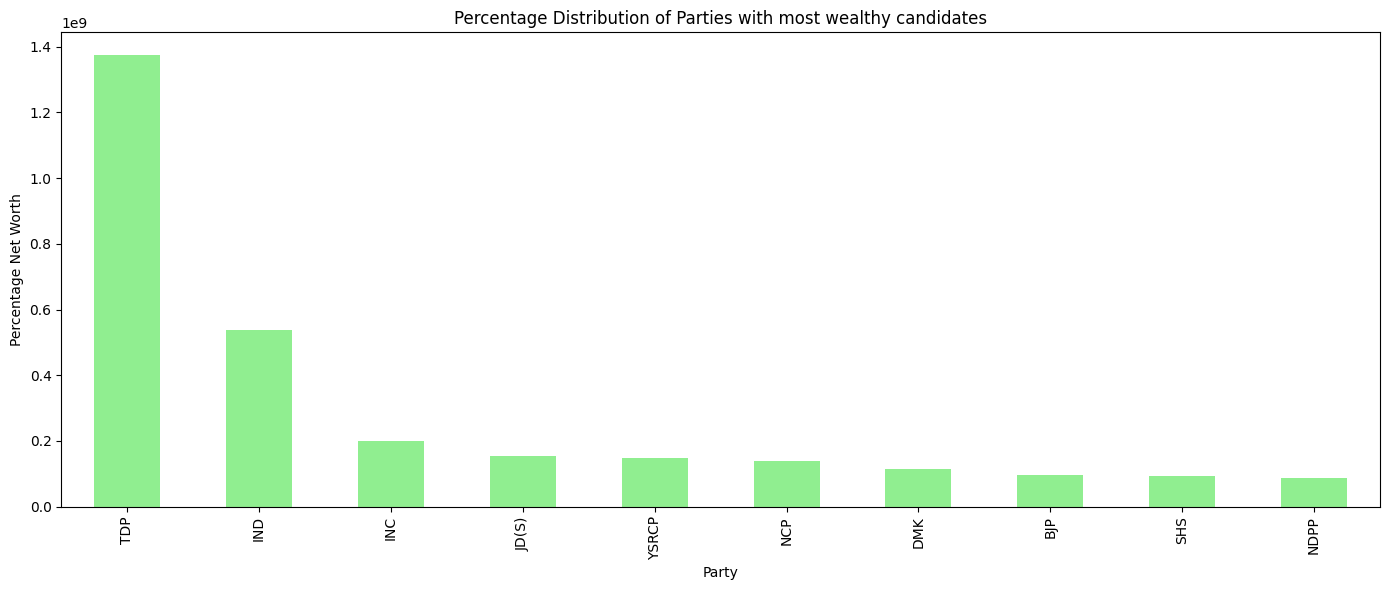

In [203]:
wealthy_party_counts = train[train['Worth'] > 9.400844e+07]['Party'].value_counts()
wealthy_party_percentages = (wealthy_party_counts / wealthy_party_counts.sum()) * 100
plt.figure(figsize=(14, 6))
wealthy_party_means.plot(kind='bar', color='lightgreen')
plt.title('Percentage Distribution of Parties with most wealthy candidates')
plt.xlabel('Party')
plt.ylabel('Percentage Net Worth')
plt.tight_layout()

plt.show()


In [199]:
threshold = train['Criminal Case'].to_frame().quantile(0.75)
print(threshold)

Criminal Case    2.0
Name: 0.75, dtype: float64


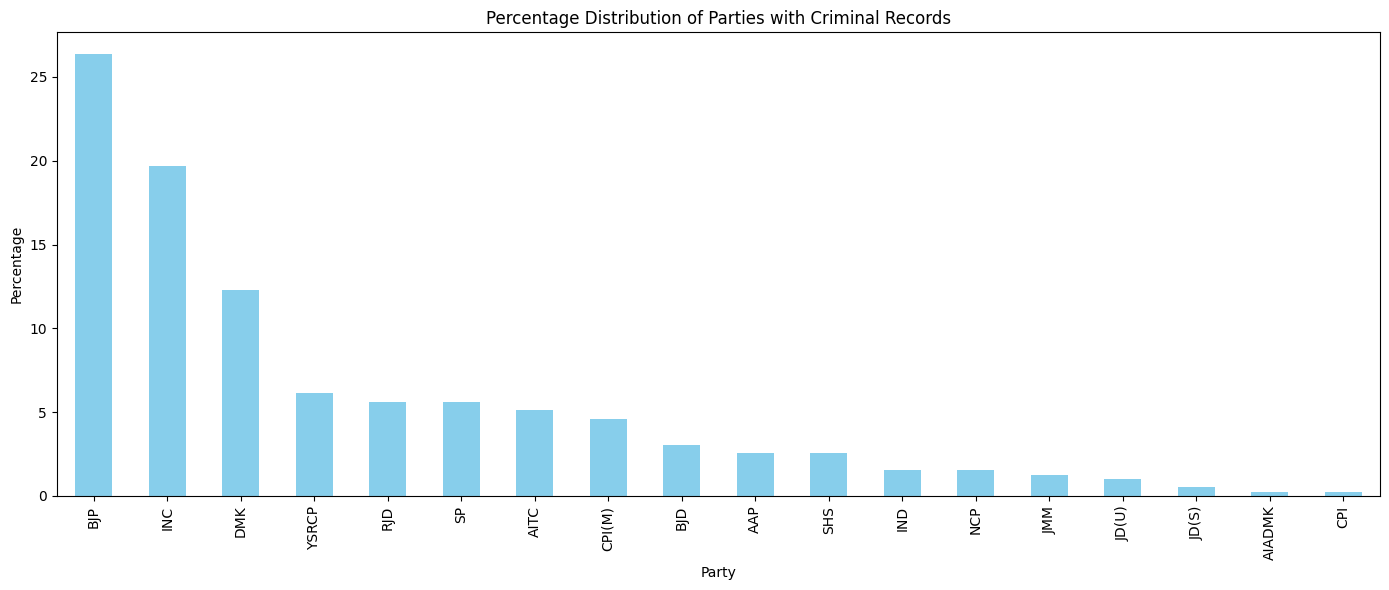

In [201]:
criminal_party_counts = train[train['Criminal Case'] > 2.0]['Party'].value_counts()
criminal_party_percentages = (criminal_party_counts / criminal_party_counts.sum()) * 100
plt.figure(figsize=(14, 6))
criminal_party_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Parties with Criminal Records')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.tight_layout()


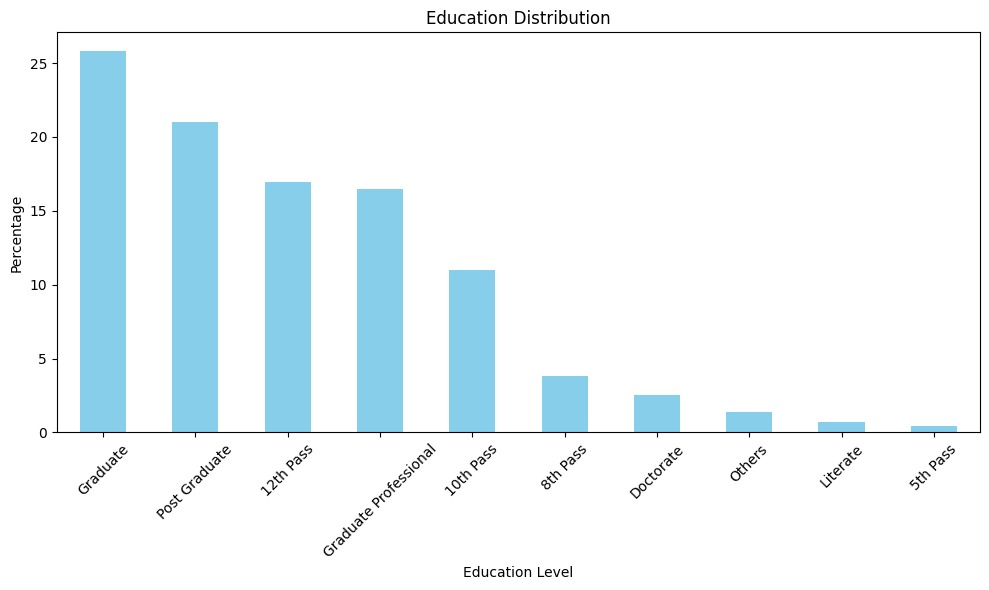

In [121]:
education_counts = Y_train['Education'].value_counts()

education_percentages = (education_counts / education_counts.sum()) * 100

plt.figure(figsize=(10, 6))
education_percentages.plot(kind='bar', color='skyblue')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[['Total Assets', 'Liabilities','Criminal Case']] = scaler.fit_transform(train[['Total Assets', 'Liabilities','Criminal Case']])

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Party          2059 non-null   object 
 1   Criminal Case  2059 non-null   float64
 2   Total Assets   2059 non-null   float64
 3   Liabilities    2059 non-null   float64
 4   state          2059 non-null   object 
 5   Worth          2059 non-null   float64
dtypes: float64(4), object(2)
memory usage: 96.6+ KB


In [124]:
train.drop('Worth',axis=1,inplace=True)

In [125]:
t_train = pd.get_dummies(train, columns=['Party','state'])
print(t_train.shape)

(2059, 54)


In [126]:
t_train.columns = t_train.columns.astype(str)
t_train = t_train.astype(float)


In [127]:
t_train.shape

(2059, 54)

In [128]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(t_train, Y_train)


# Test Data

In [206]:
test.head(5)

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH


In [207]:
def clean_currency(x):
    if isinstance(x, str):
        if 'Crore+' in x:
            return float(x.replace(' Crore+', '')) * 10000000
        elif 'Lac+' in x:
            return float(x.replace(' Lac+', '')) * 100000
        elif 'Thou+' in x:
            return float(x.replace(' Thou+', '')) * 1000
        elif 'Hund+' in x:
            return float(x.replace(' Hund+', '')) * 1000
        else:
            return float(x.replace('$', '').replace(',', ''))
    return x

In [208]:
test['Total Assets'] = test['Total Assets'].apply(clean_currency)
test['Liabilities'] = test['Liabilities'].apply(clean_currency)


In [209]:
test.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,700000000.0,110000000.0,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,20000000.0,1300000.0,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,490000000.0,10000000.0,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,20000000.0,0.0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,160000000.0,20000000.0,UTTAR PRADESH


In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1374 non-null   int64  
 1   Candidate       1374 non-null   object 
 2   Constituency ∇  1374 non-null   object 
 3   Party           1374 non-null   object 
 4   Criminal Case   1374 non-null   int64  
 5   Total Assets    1374 non-null   float64
 6   Liabilities     1374 non-null   float64
 7   state           1374 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 86.0+ KB


In [211]:
test.isnull().sum()

ID                0
Candidate         0
Constituency ∇    0
Party             0
Criminal Case     0
Total Assets      0
Liabilities       0
state             0
dtype: int64

In [212]:
test.columns

Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state'],
      dtype='object')

Text(0, 0.5, 'Number of Unique Values')

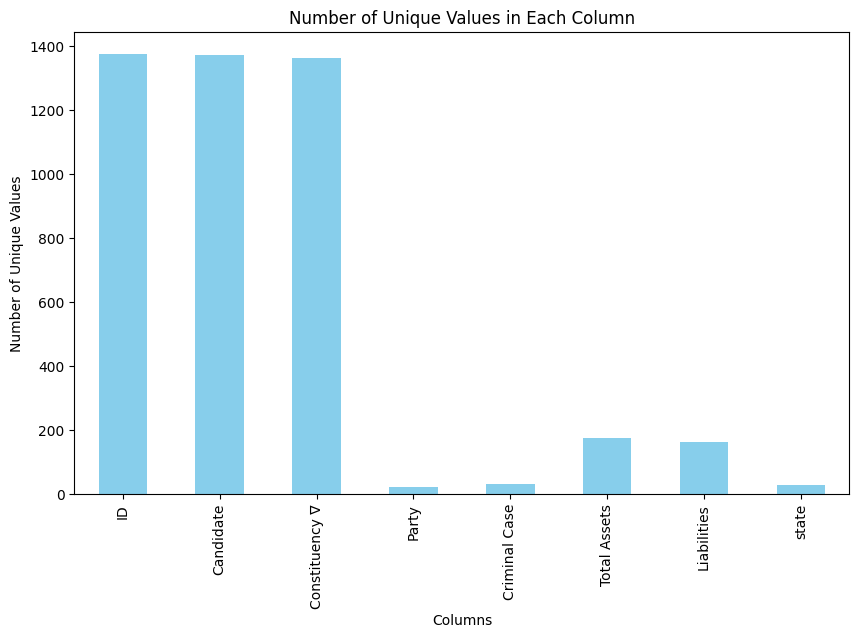

In [213]:
unique_values = test.nunique()

# Plot the results
plt.figure(figsize=(10, 6))
unique_values.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')

In [214]:
test.drop(['ID','Candidate'],axis = 1,inplace = True)

In [215]:
test.drop('Constituency ∇',axis=1,inplace=True)

In [216]:
test['Worth'] = test['Total Assets'] - test['Liabilities']

In [217]:
threshold = test['Worth'].to_frame().mean()
print(threshold)

Worth    9.977171e+07
dtype: float64


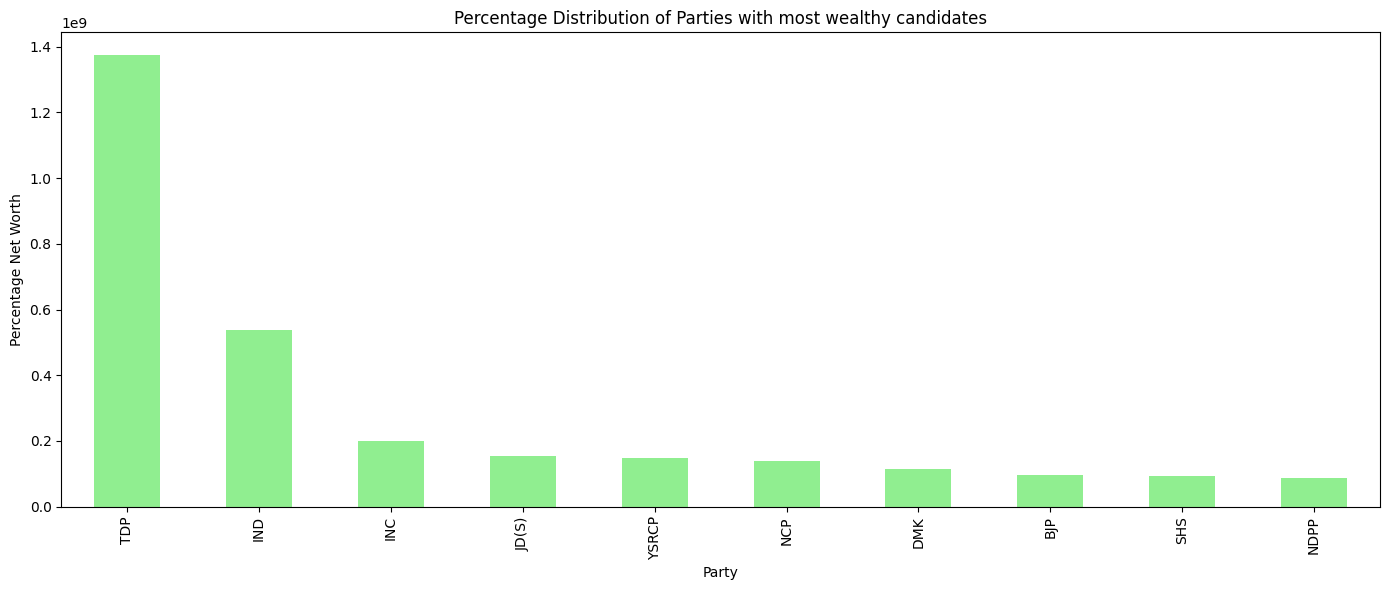

In [218]:
wealthy_party_counts = test[test['Worth'] > 9.977171e+07]['Party'].value_counts()
wealthy_party_percentages = (wealthy_party_counts / wealthy_party_counts.sum()) * 100
plt.figure(figsize=(14, 6))
wealthy_party_means.plot(kind='bar', color='lightgreen')
plt.title('Percentage Distribution of Parties with most wealthy candidates')
plt.xlabel('Party')
plt.ylabel('Percentage Net Worth')

plt.tight_layout()

plt.show()

In [220]:
threshold = test['Criminal Case'].to_frame().quantile(0.75)
print(threshold)

Criminal Case    2.0
Name: 0.75, dtype: float64


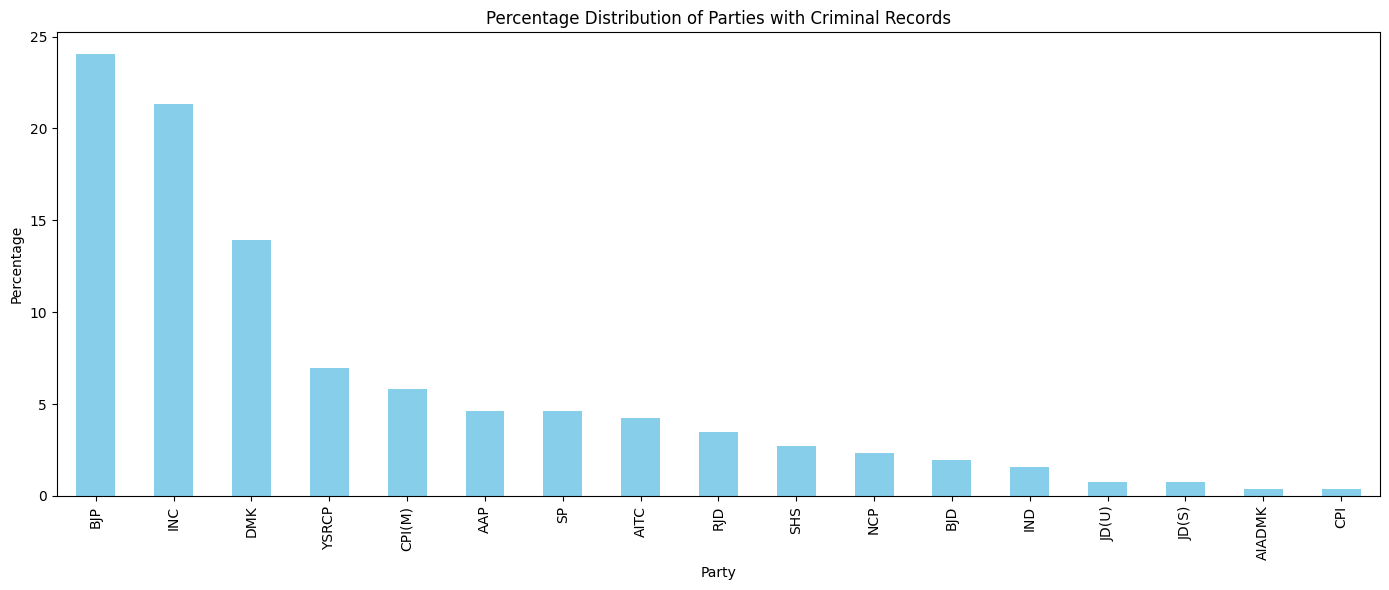

In [221]:
criminal_party_counts = test[test['Criminal Case'] > 2.0]['Party'].value_counts()
criminal_party_percentages = (criminal_party_counts / criminal_party_counts.sum()) * 100
plt.figure(figsize=(14, 6))
criminal_party_percentages.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Parties with Criminal Records')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.tight_layout()


In [144]:
test.drop('Worth',axis=1,inplace=True)

In [145]:
test[['Total Assets', 'Liabilities','Criminal Case']] = scaler.transform(test[['Total Assets', 'Liabilities','Criminal Case']])

In [146]:
t_test = pd.get_dummies(test, columns=['Party','state'])
print(t_test.shape)

(1374, 54)


In [147]:
t_test.columns = t_test.columns.astype(str)
t_test = t_test.astype(float)

In [148]:
t_test.shape

(1374, 54)

# Training

In [149]:
y_train_t = np.squeeze(Y_train)

In [150]:
X_train,X_val,y_train,y_val = train_test_split(t_train,y_train_t,test_size=0.3,random_state=50)

In [151]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1441, 54)
(618, 54)
(1441,)
(618,)


In [152]:
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [153]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [154]:
y_val_pred1 = lm.predict(X_val)

In [155]:
print(classification_report(y_val, y_val_pred1))

                       precision    recall  f1-score   support

            10th Pass       0.00      0.00      0.00        62
            12th Pass       0.13      0.04      0.07        91
             5th Pass       0.00      0.00      0.00         2
             8th Pass       0.00      0.00      0.00        33
            Doctorate       0.00      0.00      0.00        10
             Graduate       0.23      0.45      0.31       164
Graduate Professional       0.21      0.08      0.11       106
             Literate       0.00      0.00      0.00         4
               Others       0.00      0.00      0.00         9
        Post Graduate       0.25      0.40      0.31       137

             accuracy                           0.23       618
            macro avg       0.08      0.10      0.08       618
         weighted avg       0.17      0.23      0.18       618



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [156]:
from sklearn.linear_model import SGDClassifier

In [157]:
sgd_classifier = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
sgd_classifier.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [177]:
y_val_p = sgd_classifier.predict(X_val)
print(classification_report(y_val, y_val_p))

                       precision    recall  f1-score   support

            10th Pass       0.12      0.05      0.07        62
            12th Pass       0.17      0.21      0.19        91
             5th Pass       0.00      0.00      0.00         2
             8th Pass       0.00      0.00      0.00        33
            Doctorate       0.00      0.00      0.00        10
             Graduate       0.25      0.31      0.27       164
Graduate Professional       0.16      0.18      0.17       106
             Literate       0.00      0.00      0.00         4
               Others       0.06      0.22      0.09         9
        Post Graduate       0.24      0.15      0.18       137

             accuracy                           0.18       618
            macro avg       0.10      0.11      0.10       618
         weighted avg       0.18      0.18      0.18       618



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
rfc_classifier = RandomForestClassifier(random_state=42)

In [160]:
param_grid = {'n_estimators': [100,250,500,750,1000]}
gs_rfc = GridSearchCV(estimator=rfc_classifier, param_grid=param_grid, cv=10)


In [161]:
gs_rfc.fit(X_train, y_train)
rfc = gs_rfc.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [162]:
best_rfc_p = gs_rfc.best_params_
best_rfc_s = gs_rfc.best_score_

print("Best Parameters:", best_rfc_p)
print("Best Score:", best_rfc_s)


Best Parameters: {'n_estimators': 1000}
Best Score: 0.21026819923371648


In [163]:
y_val_pred1 = rfc.predict(X_val)

In [164]:
print(confusion_matrix(y_val,y_val_pred1))

[[ 6 14  0  0  0 19  9  0  0 14]
 [ 9 14  2  3  0 31 14  0  2 16]
 [ 1  0  0  0  0  1  0  0  0  0]
 [ 8  6  0  0  0  9  6  0  0  4]
 [ 1  4  0  0  0  4  1  0  0  0]
 [15 26  0  6  5 45 21  0  2 44]
 [10 11  0  2  4 32 17  0  1 29]
 [ 1  0  0  0  0  1  1  0  0  1]
 [ 0  0  0  1  0  4  1  0  0  3]
 [15 24  1  3  2 35 19  1  0 37]]


In [165]:
print(classification_report(y_val,y_val_pred1))

                       precision    recall  f1-score   support

            10th Pass       0.09      0.10      0.09        62
            12th Pass       0.14      0.15      0.15        91
             5th Pass       0.00      0.00      0.00         2
             8th Pass       0.00      0.00      0.00        33
            Doctorate       0.00      0.00      0.00        10
             Graduate       0.25      0.27      0.26       164
Graduate Professional       0.19      0.16      0.17       106
             Literate       0.00      0.00      0.00         4
               Others       0.00      0.00      0.00         9
        Post Graduate       0.25      0.27      0.26       137

             accuracy                           0.19       618
            macro avg       0.09      0.10      0.09       618
         weighted avg       0.18      0.19      0.19       618



In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
k = 10
knn = KNeighborsClassifier(n_neighbors=k)


In [169]:
knn.fit(X_train, y_train)
y_pred4 = knn.predict(X_val)
print(classification_report(y_val, y_pred4))

                       precision    recall  f1-score   support

            10th Pass       0.09      0.11      0.10        62
            12th Pass       0.15      0.20      0.17        91
             5th Pass       0.00      0.00      0.00         2
             8th Pass       0.00      0.00      0.00        33
            Doctorate       0.00      0.00      0.00        10
             Graduate       0.23      0.26      0.25       164
Graduate Professional       0.18      0.17      0.18       106
             Literate       0.00      0.00      0.00         4
               Others       0.00      0.00      0.00         9
        Post Graduate       0.28      0.27      0.27       137

             accuracy                           0.20       618
            macro avg       0.09      0.10      0.10       618
         weighted avg       0.19      0.20      0.19       618



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
from sklearn.svm import SVC

In [171]:
sv = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
sv.fit(X_train, y_train)
y_val_pred2 = sv.predict(X_val)

print(classification_report(y_val, y_val_pred2))

                       precision    recall  f1-score   support

            10th Pass       0.06      0.03      0.04        62
            12th Pass       0.08      0.02      0.03        91
             5th Pass       0.00      0.00      0.00         2
             8th Pass       0.00      0.00      0.00        33
            Doctorate       0.00      0.00      0.00        10
             Graduate       0.25      0.59      0.35       164
Graduate Professional       0.16      0.06      0.08       106
             Literate       0.00      0.00      0.00         4
               Others       0.00      0.00      0.00         9
        Post Graduate       0.30      0.31      0.31       137

             accuracy                           0.24       618
            macro avg       0.09      0.10      0.08       618
         weighted avg       0.18      0.24      0.19       618



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
from sklearn.naive_bayes import BernoulliNB

In [173]:
bnc = BernoulliNB()

In [174]:
bnc.fit(X_train, y_train)

BernoulliNB()

In [175]:
y_val_pred3 = bnc.predict(X_val)

In [176]:
print(classification_report(y_val, y_val_pred3))

                       precision    recall  f1-score   support

            10th Pass       0.12      0.08      0.10        62
            12th Pass       0.16      0.13      0.14        91
             5th Pass       0.00      0.00      0.00         2
             8th Pass       0.00      0.00      0.00        33
            Doctorate       0.00      0.00      0.00        10
             Graduate       0.24      0.32      0.27       164
Graduate Professional       0.21      0.12      0.15       106
             Literate       0.00      0.00      0.00         4
               Others       0.00      0.00      0.00         9
        Post Graduate       0.26      0.37      0.30       137

             accuracy                           0.22       618
            macro avg       0.10      0.10      0.10       618
         weighted avg       0.19      0.22      0.20       618



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred3 = bnc.predict(t_test)

In [ ]:
index_values = np.arange(len(pred3))
predict_df = pd.DataFrame({'ID': index_values, 'Education': pred3})
predict_df.to_csv('pred.csv', index=False)